# 1. Télévision, émissions de mi-temps et Big Game
Que vous aimiez ou non le football, le Super Bowl est un spectacle. Il y a un petit quelque chose pour tout le monde à votre soirée Super Bowl. Drame sous forme d'éruptions, de retours et de controverses pour les amateurs de sport. Il y a les publicités ridiculement chères, certaines hilarantes, d'autres déchirantes, provocantes et étranges. La mi-temps montre avec les plus grands musiciens du monde, chevauchant parfois des tigres mécaniques géants ou sautant du toit du stade. C'est un spectacle, bébé. Et dans ce cahier, nous allons découvrir comment certains éléments de ce spectacle interagissent les uns avec les autres. Après avoir exploré et nettoyé un peu nos données, nous allons répondre à des questions comme:

.Quels sont les résultats de jeu les plus extrêmes?
.Comment le jeu affecte-t-il l'audience de la télévision?
.Comment le nombre de vues, les cotes d'écoute télévisées et le coût des publicités ont-ils évolué au fil du temps?
.Quels sont les musiciens les plus prolifiques en termes de performances de spectacle à la mi-temps?

Auteur: Stefen Mbiombani,
Technologie: Python,
Dataset game_data: https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions,
Dataset Tv_data: https://en.wikipedia.org/wiki/Super_Bowl_television_ratings,
Dataset Haltime_musician: https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows,

Montréal 2020-03-05


In [12]:
#import librairie
import pandas as pd

#Load Csv
super_bowls = pd.read_csv("super_bowls.csv")
tv = pd.read_csv('tv.csv')
halftime_musicians =  pd.read_csv('halftime_musicians.csv')

#Display the first five rows
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


# 2. Prendre note des problèmes relatifs aux jeux de données
Pour les données du jeu du Super Bowl, nous pouvons voir que l'ensemble de données apparaît entier, sauf pour les valeurs manquantes dans les colonnes de sauvegarde du quart-arrière (qb_winner_2 et qb_loser_2), qui ont un sens étant donné la plupart des QB de départ dans le Super Bowl (qb_winner_1 et qb_loser_1) jouent le jeu entier.

De l'inspection visuelle des données des musiciens de télévision et de mi-temps, il n'y a qu'une seule valeur manquante affichée, mais j'ai une intuition il y en a plus. Le Super Bowl remonte à 1967, et les colonnes plus granulaires (par exemple, le nombre de chansons pour les musiciens de mi-temps) n'ont probablement pas été suivies de manière fiable au fil du temps. Wikipédia est génial mais pas parfait.

Une inspection de la sortie .info () pour tv et halftime_musicians nous montre qu'il existe plusieurs colonnes avec des valeurs nulles.

In [4]:
# Summary of the TV data to inspect
tv.info()

print('\n')

# Summary of the halftime musician data to inspect
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_viewers      53 non-null int64
total_us_viewers    15 non-null float64
rating_household    53 non-null float64
share_household     53 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             53 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


# 3. Répartition des points combinés
Pour les données TV, les colonnes suivantes ont des valeurs manquantes et beaucoup d'entre elles:

total_us_viewers (nombre de téléspectateurs américains qui ont regardé au moins une partie de la diffusion)
rating_18_49 (% moyen des adultes américains âgés de 18 à 49 ans qui vivent dans un ménage avec une télévision qui regardaient pendant toute la diffusion)
share_18_49 (% moyen des adultes américains âgés de 18 à 49 ans qui vivent dans un ménage avec un téléviseur utilisé qui regardaient la totalité de l'émission)
Pour les données des musiciens de mi-temps, il manque un nombre de chansons jouées (num_songs) pour environ un tiers des performances.

Il existe de nombreuses raisons potentielles à ces valeurs manquantes. Les données ont-elles déjà été suivies? At-il été perdu dans l'histoire? L'effort de recherche pour rendre l'ensemble de ces données en vaut-il la peine? Peut être. Regarder chaque spectacle de mi-temps du Super Bowl pour obtenir le nombre de chansons serait assez amusant. Mais nous n'avons pas le temps de faire ce genre de choses maintenant! Prenons note de l'endroit où l'ensemble de données n'est pas parfait et commençons à découvrir quelques informations.

Commençons par regarder les points combinés pour chaque Super Bowl en visualisant la distribution. Identifions également les Super Bowls avec les scores les plus élevés et les plus bas.

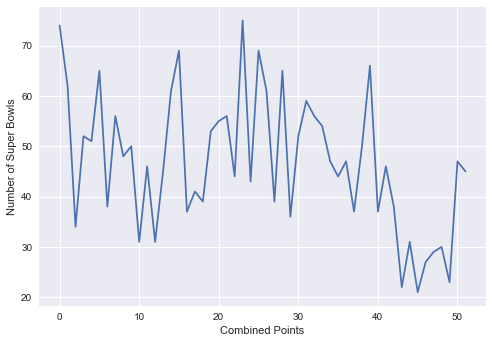

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [5]:
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.plot(super_bowls.combined_pts)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[ super_bowls['combined_pts'] < 25])

# 4. Distribution des différences de points
La plupart des scores combinés sont d'environ 40 à 50 points, les extrêmes étant à peu près à égale distance dans des directions opposées. En remontant aux scores combinés les plus élevés à 74 et 75, nous trouvons deux matchs avec des performances de quart-arrière dominantes. Un événement s'est même produit récemment au Super Bowl LII en 2018, où les Patriots de Tom Brady ont perdu face aux outsiders de Nick Foles, les Eagles 41-33, pour un score combiné de 74.

En descendant vers les scores combinés les plus bas, nous avons le Super Bowl III et VII, qui présentait des défenses difficiles qui dominaient. Nous avons également le Super Bowl IX à la Nouvelle-Orléans en 1975, dont le score de 16-6 peut être attribué aux intempéries. Le champ était glissant de la pluie nocturne, et il faisait froid à 46 ° F (8 ° C), ce qui rendait difficile pour les Steelers et les Vikings de faire beaucoup d'offensives. C'était le deuxième Super Bowl le plus froid de tous les temps et le dernier à être joué par mauvais temps depuis plus de 30 ans. La NFL a réalisé que les gens aiment les points, je suppose.

MISE À JOUR: Dans le Super Bowl LIII en 2019, les Patriots et les Rams ont battu le record du Super Bowl avec le score le plus bas avec un score combiné de 16 points (13-3 pour les Patriots).

Jetons maintenant un œil à la différence de points.

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


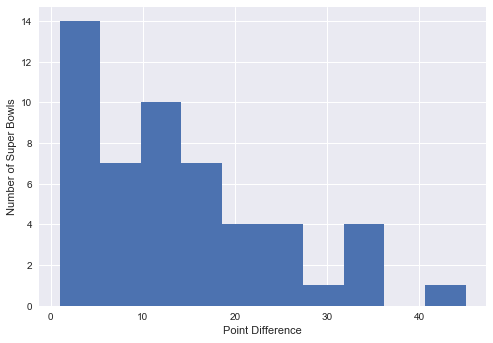

In [6]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show


# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] >= 35])

# 5. Les éruptions se traduisent-elles par des téléspectateurs perdus?
La grande majorité des Super Bowls sont des matchs serrés. Logique. Les deux équipes mériteront probablement si elles sont arrivées aussi loin. Le match le plus proche a été celui où les Buffalo Bills ont perdu contre les Giants de New York par 1 point en 1991, ce qui était le plus connu pour la tentative de Scott Norwood à la dernière seconde ratée qui était allée à droite, donnant le coup d'envoi à quatre défaites consécutives du Super Bowl des Bills. . Pauvre Scott. Le plus grand écart de points jamais enregistré était de 45 points (!) Où le Hall of Famer Joe Montana a mené les 49ers de San Francisco à la victoire en 1990, un an avant le match le plus proche de tous les temps.

Je me souviens d'avoir vu les Seahawks écraser les Broncos de 35 points (43-8) en 2014, ce qui était une expérience ennuyeuse à mon avis. Le match n'a jamais été vraiment serré. Je suis presque sûr que nous avons changé de chaîne à la fin du troisième trimestre. Combinons nos données de jeu et notre télévision pour voir s'il s'agit d'un phénomène universel. Les différences de points importantes se traduisent-elles par des téléspectateurs perdus? Nous pouvons tracer la part des ménages (pourcentage moyen de ménages américains avec un téléviseur utilisé qui regardaient pendant toute la diffusion) par rapport à la différence de points pour le savoir.

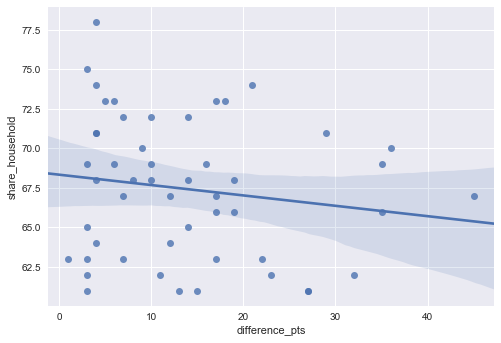

In [7]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Import seaborn
import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x='difference_pts', y='share_household', data=games_tv)

# 6. Audience et industrie de la publicité au fil du temps
La ligne de régression inclinée vers le bas et l'intervalle de confiance à 95% pour cette régression suggèrent que le renflouement du jeu s'il s'agit d'une éruption est courant. Bien qu'il corresponde à notre intuition, nous devons le prendre avec un grain de sel car la relation linéaire dans les données est faible en raison de notre petite taille d'échantillon de 52 jeux.

Quel que soit le score, je parie que la plupart des gens s'en tiennent à l'émission de mi-temps, ce qui est une bonne nouvelle pour les réseaux de télévision et les annonceurs. Un spot de 30 secondes coûte maintenant 5 millions de dollars, mais en a-t-il toujours été ainsi? Et comment le nombre de téléspectateurs et les notes des ménages ont-ils évolué parallèlement au coût de l'annonce? Nous pouvons le découvrir en utilisant des tracés linéaires qui partagent un axe X "Super Bowl".

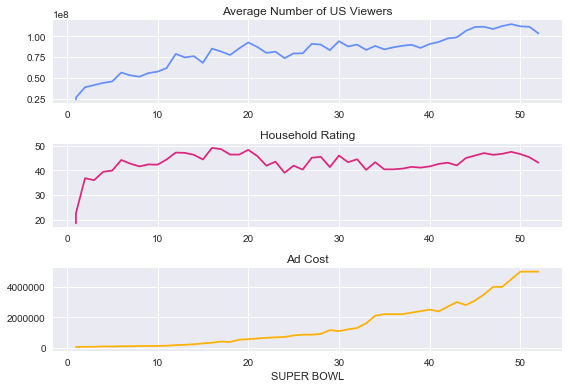

In [8]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color='#DC267F' )
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

# 7. Les spectacles de mi-temps n'ont pas toujours été aussi bons
Nous pouvons voir les téléspectateurs augmenter avant les coûts publicitaires. Peut-être que les réseaux n'étaient pas très avertis en matière de données et tardaient à réagir? Cela a du sens puisque DataCamp n'existait pas à l'époque.

Une autre hypothèse: peut-être que la mi-temps n'était pas si bonne au cours des premières années? Le spectacle moderne du Super Bowl a beaucoup à voir avec le prestige culturel des grands numéros de la mi-temps. Je suis descendu dans un terrier de lapin YouTube et il s'avère que les anciens n'étaient pas conformes aux normes d'aujourd'hui. Certains délinquants:

Super Bowl XXVI en 1992: Un rap Frosty The Snowman interprété par des enfants.
Super Bowl XXIII en 1989: un imitateur d'Elvis qui a fait des tours de magie et n'a même pas chanté une chanson d'Elvis.
Super Bowl XXI en 1987: poneys de claquettes. (D'accord, c'est assez génial en fait.)
Il s'avère que la performance de Michael Jackson au Super Bowl XXVII, l'un des événements les plus regardés de l'histoire de la télévision américaine, a eu lieu lorsque la NFL a réalisé la valeur du temps d'antenne du Super Bowl et décidé qu'elle devait désormais signer des grands noms. Les émissions de mi-temps avant MJ n'étaient en effet pas si impressionnantes, ce que nous pouvons voir en filtrant nos données halftime_musician.


In [9]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
halftime_musicians[halftime_musicians.super_bowl <=27 ]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


# 8. Qui a le plus d'apparitions à la mi-temps?
Beaucoup de fanfares. Clarinettiste de jazz américain Pete Fountain. Miss Texas 1973 joue du violon. Rien contre ces artistes, ils ne sont tout simplement pas Beyoncé. Pour être juste, personne ne l'est.

Voyons tous les musiciens qui ont fait plus d'un spectacle à la mi-temps, y compris leur nombre de performances.

In [10]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


# 9. Qui a interprété le plus de chansons dans un spectacle à la mi-temps?
La célèbre fanfare Tiger Marching Band de la Grambling State University remporte la couronne avec six apparitions. Beyoncé, Justin Timberlake, Nelly et Bruno Mars sont les seuls musiciens post-Y2K à apparitions multiples (deux chacun).

De nos inspections précédentes, la colonne num_songs a beaucoup de valeurs manquantes:

Beaucoup de fanfares n'ont pas d'entrées num_songs.
Pour les bandes qui ne marchent pas, les données manquantes commencent à se produire au Super Bowl XX.
Filtrons les fanfares en filtrant les musiciens avec le mot "Marching" et le mot "Spirit" (une convention de dénomination commune pour les fanfares est "Spirit of [something]"). Ensuite, nous filtrerons les Super Bowls après le Super Bowl XX pour résoudre le problème de données manquantes, puis voyons qui a le plus de chansons.

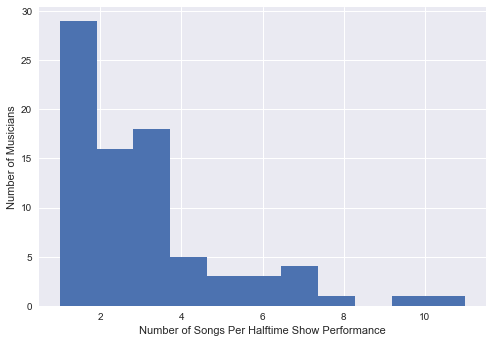

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [11]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins= most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))

# 10. Conclusion
La plupart des musiciens non-groupe font donc 1 à 3 chansons par spectacle à la mi-temps. Il est important de noter que la durée du spectacle à la mi-temps est fixe (environ 12 minutes), donc les chansons par performance sont plus une mesure du nombre de chansons à succès que vous avez. JT est parti en 2018, wow. 11 chansons! Diana Ross arrive deuxième avec 10 dans son mélange en 1996.

Dans ce cahier, nous avons chargé, nettoyé, puis exploré les données du jeu, de la télévision et de la mi-temps du Super Bowl. Nous avons visualisé les distributions de points combinés, les différences de points et les performances de spectacle à la mi-temps à l'aide d'histogrammes. Nous avons utilisé des graphiques linéaires pour voir comment les augmentations des coûts publicitaires étaient inférieures à celles de l'audience. Et nous avons découvert que les éruptions semblent entraîner une baisse du nombre de téléspectateurs.

Le Big Game de cette année sera là avant que vous le sachiez. Selon vous, qui gagnera le Super Bowl LIII?

Stef MB 2020-03-05
